<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 19: Comparing Distributions

Associated Textbook Sections: [11.1, 11.2](https://ccsf-math-108.github.io/textbook/chapters/11/2/Multiple_Categories.html)

---

## Outline

* [Comparing Distributions](#Comparing-Distributions)
* [A New Statistic](#A-New-Statistic)
* [Testing Hypotheses](#Testing-Hypotheses)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Comparing Distributions

---

### Jury Selection in Alameda County

<img src="./ACLU_report.png" alt="ACLU Report" width=40%>

Report Source: [ACLU of Northern California - RACIAL AND ETHNIC DISPARITIES IN ALAMEDA COUNTY JURY POOLS (2010)](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf)

---

### Jury Panels

<img src="./jury_selection_process.png" alt="jury selection process" width = 80%>

Section 197 of California's Code of Civil Procedure says,
> "All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court."

---

### Demo: Alameda County Jury Panels

* Visualize the the eligible and panel distributions of ethnicities based on the Totals in the report.
* Under the model, define an array that represents the distribution of people from which the jurors are randomly sampled
* Simulate a random draw of 1423 jurors from this distribution
* The actual observed distribution (Panels) looks quite different from the simulation -- try simulating this several times to confirm!
* Visualize the results of the last simulation.

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI ', 'Black/AA', 'Hispanic ', 'Caucasian', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Hispanic,0.12,0.08
Caucasian,0.54,0.54
Other,0.01,0.04


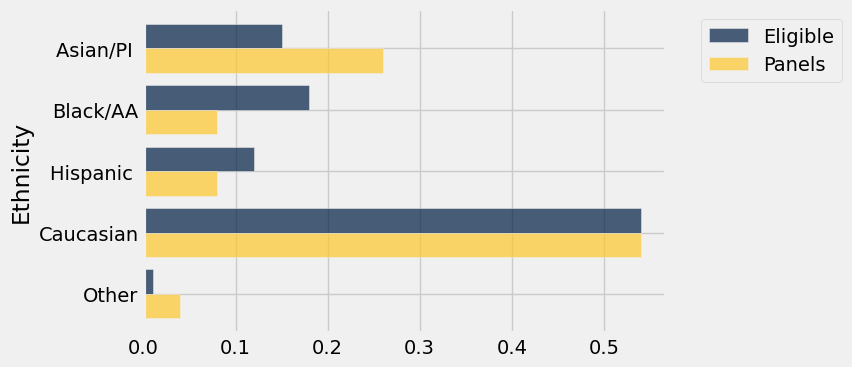

In [ ]:
jury.barh('Ethnicity')

In [ ]:
model = make_array(0.15,0.18,0.12,0.54,0.01)

In [ ]:
simulated = sample_proportions(1423, model)
simulated

array([ 0.14476458,  0.17006325,  0.10962755,  0.56570625,  0.00983837])

In [ ]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian/PI,0.15,0.26,0.144765
Black/AA,0.18,0.08,0.170063
Hispanic,0.12,0.08,0.109628
Caucasian,0.54,0.54,0.565706
Other,0.01,0.04,0.00983837


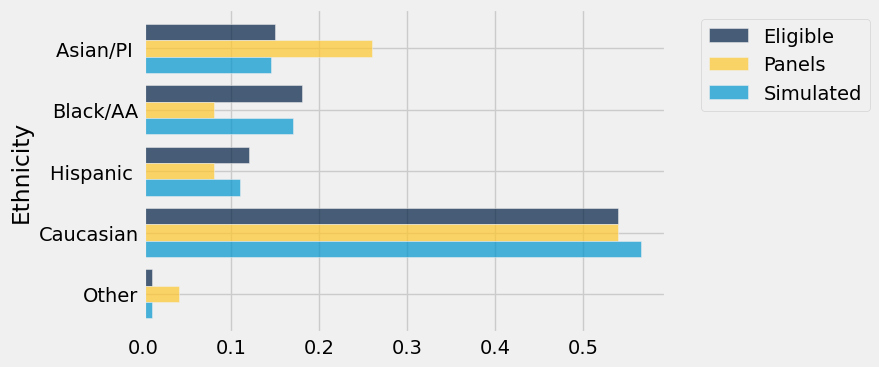

In [ ]:
jury_with_simulated.barh('Ethnicity')

---

## A New Statistic

---

### Distance Between Distributions

* People on the panels are of multiple ethnicities
* Distribution of ethnicities is categorical
* To see whether the distribution of ethnicities of the panels is close to that of the eligible jurors, we have to measure the distance between two categorical distributions


---

### Demo: Distance Between Distributions

In the last lecture, the difference between observed black/purple and their expected values (26%/75%) was our statistic. In this case, we need to understand how each of the 5 categories differ from their expected values according to the model.

Add a column to the `jury` table with the difference between the eligible and actual percentages for each ethnicity category.

In [ ]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Hispanic,0.12,0.08,-0.04
Caucasian,0.54,0.54,0
Other,0.01,0.04,0.03


---

### Total Variation Distance

Total Variation Distance (TVD) Recipe:
* For each category, compute the difference in proportions between two distributions
* Take the absolute value of each difference
* Sum, and then divide the sum by 2


---

### Demo: Total Variation Distance

* Define a function that calculates the TVD for two provided distribution arrays.
* Calculate the TVD of our observed data (Panels) from their expected values assuming the model is true (Eligible)
* Calculate the TVD of a model simulation from its expected values
* Replicate creating sample juries and calculate the TVD in relation to the model 10000 times.
* Visualize how the observed statistic fits in the distribution formed from those simulated TVD values.

In [ ]:
def tvd(dist1, dist2):
    return sum(abs(dist1-dist2))/2

In [ ]:
dist1 = make_array(1, 2, 3)
dist2 = make_array(0, 2, 4)
tvd(dist1, dist2)

1.0

In [ ]:
observed_proportions = jury.column('Panels')
obsvd_tvd = tvd(observed_proportions, model)
obsvd_tvd

0.14000000000000001

In [ ]:
simulated_proportions = sample_proportions(1423, model)
tvd(simulated_proportions, model)

0.017259311314125128

In [ ]:
def simulated_tvd():
    simulated_proportions = sample_proportions(1423, model)
    return tvd(simulated_proportions, model)

tvds = make_array()
num_simulations = 10_000

for _ in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


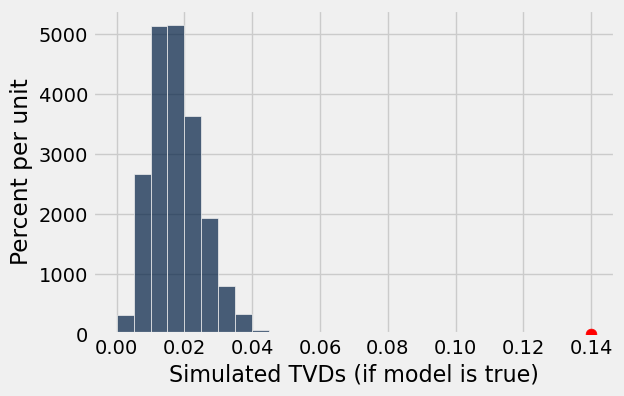

In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
plt.scatter(0.14, 0, color='red', s=60, zorder=3)
print('Observed TVD: ' + str(obsvd_tvd))

---

### Summary of the Method

To assess whether a sample was drawn randomly from a known categorical distribution:
* Use TVD as the statistic because it measures the distance between categorical distributions
* Sample at random from the population and compute the TVD from the random sample; repeat numerous times
* Compare:
    * Empirical distribution of simulated TVDs
    * Actual TVD from the sample in the study


---

## Testing Hypotheses

---

### Testing Hypotheses

* A test chooses between two views of how data were generated
* The views are called hypotheses
* The test picks the hypothesis that is better supported by the observed data


---

### Null and Alternative

The method only works if we can simulate data under one of the hypotheses.
* Null hypothesis:
    * A well defined chance model about how the data were generated
    * We can simulate data under the assumptions of this model – “under the null hypothesis”
* Alternative hypothesis: A different view about the origin of the data


---

### Test Statistic

* The statistic that we choose to simulate, to decide between the two hypotheses
* Questions before choosing the statistic:
    * What values of the statistic will make us lean towards the null hypothesis?
    * What values will make us lean towards the alternative? Preferably, the answer should be just "high". Try to avoid "both high and low".


---

### Prediction Under the Null Hypothesis

* Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values
* This displays the **empirical distribution of the statistic under the null hypothesis**
* It is a prediction about the statistic, made by the null hypothesis
    * It shows all the likely values of the statistic
    * Also how likely they are (**if the null hypothesis is true**)
* The probabilities are approximate, because we can't generate all the possible random samples


---

### Conclusion of the Test

* Resolve choice between null and alternative hypotheses
    * Compare the **observed test statistic** and its empirical distribution under the null hypothesis
    * If the observed value is **not consistent** with the distribution, then the test favors the alternative ("data is more consistent with the alternative")
* Whether a value is consistent with a distribution:
    * A visualization may be sufficient
    * If not, there are conventions about "consistency"

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>